# import necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import face_recognition

# load classifier and image

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image = cv2.imread("me2.jpeg")

# convert image to greyscale and perform detection

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))
known_face_names=["elsaify","medany"]
known_face_encodings = []
for (x, y, w, h) in faces:
    face_region = image[y:y+h, x:x+w]
    rgb_face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)
    face_encoding = face_recognition.face_encodings(rgb_face_region)[0]
    known_face_encodings.append(face_encoding)  # Append the face encoding to the list
for idx, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, known_face_names[idx], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)


# Display image coloured after detection and rectangle drawing

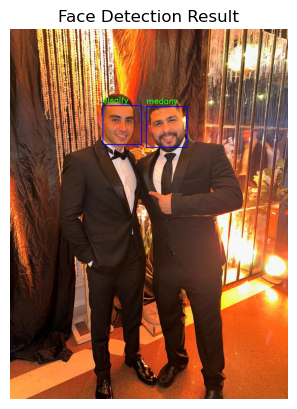

In [4]:
image_colored = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_colored)
plt.axis('off')  # Hide axis
plt.title('Face Detection Result')
plt.show()

# Test the model for recognition

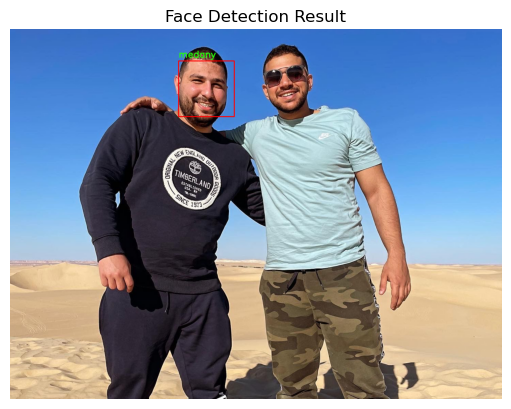

In [6]:
image = cv2.imread("me.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))
for (x, y, w, h) in faces:
    face_region = image_rgb[y:y+h, x:x+w]
    rgb_face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)
    face_encodings = face_recognition.face_encodings(rgb_face_region)
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        if True in matches:
            name = known_face_names[matches.index(True)]
            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(image_rgb, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
plt.imshow(image_rgb)
plt.axis('off')  
plt.title('Face Detection Result')
plt.show()